In [1]:
import pandas as pd
from utils import train as tr

/data1/yz812/mcm/utils/train.py:186: SyntaxWarning: "is" with a literal. Did you mean "=="?
  result = (self.result1 if pl is 1 else self.result2).sort_values(by=1, ascending=False)
/data1/yz812/mcm/utils/train.py:188: SyntaxWarning: "is" with a literal. Did you mean "=="?
  result = (self.result1 if pl is 1 else self.result2)


In [2]:
players = pd.read_csv("data/0-1-IneriaRanks.csv")
players=players.set_index(players.columns[0])
pairs = pd.read_csv("data/0-1-PlayerPairs.csv")
pairs.head()

,Unnamed: 0,player1,player2
0,0,Carlos Alcaraz,Nicolas Jarry
1,1,Alexander Zverev,Matteo Berrettini
2,2,Frances Tiafoe,Grigor Dimitrov
3,3,Alejandro Davidovich Fokina,Holger Rune
4,4,Daniil Medvedev,Marton Fucsovics


In [3]:
_dictionary = pd.read_csv("data_dictionary.csv")
_data = pd.read_csv("Wimbledon_featured_matches.csv")

In [4]:
dictionary = _dictionary.copy()
data = _data.copy()
data.head()

,match_id,player1,player2,elapsed_time,set_no,game_no,point_no,p1_sets,p2_sets,p1_games,...,p2_break_pt_won,p1_break_pt_missed,p2_break_pt_missed,p1_distance_run,p2_distance_run,rally_count,speed_mph,serve_width,serve_depth,return_depth
0,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:00,1,1,1,0,0,0,...,0,0,0,6.000,7.840,2,95.0,BC,NCTL,ND
1,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:00:38,1,1,2,0,0,0,...,0,0,0,5.253,7.094,1,118.0,B,CTL,ND
2,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:01,1,1,3,0,0,0,...,0,0,0,13.800,19.808,4,120.0,B,NCTL,D
3,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:01:31,1,1,4,0,0,0,...,0,0,0,51.108,75.631,13,130.0,BW,CTL,D
4,2023-wimbledon-1301,Carlos Alcaraz,Nicolas Jarry,00:02:21,1,1,5,0,0,0,...,0,0,0,0.649,0.813,1,112.0,W,NCTL,NaN


# Self Training

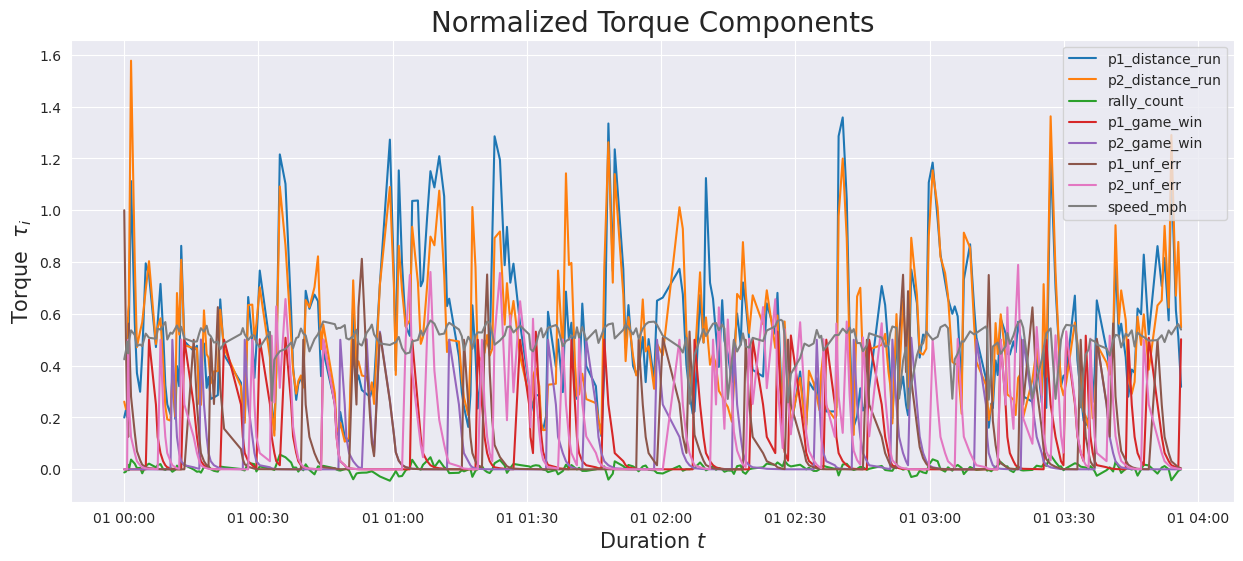

In [5]:
unit = tr.ModelUnit("Carlos Alcaraz", "Nicolas Jarry", data)

unit.preprocess()
unit.prefilter()
unit.show_components()

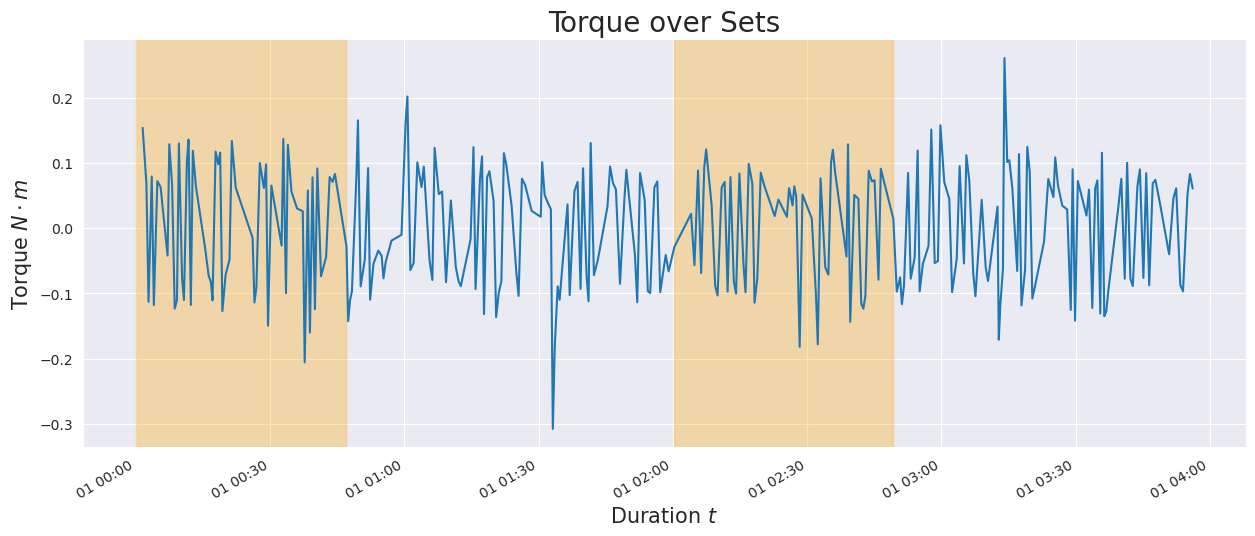

In [6]:
unit.calc_torque(players["Inertia"])
unit.show_calculated_torque()

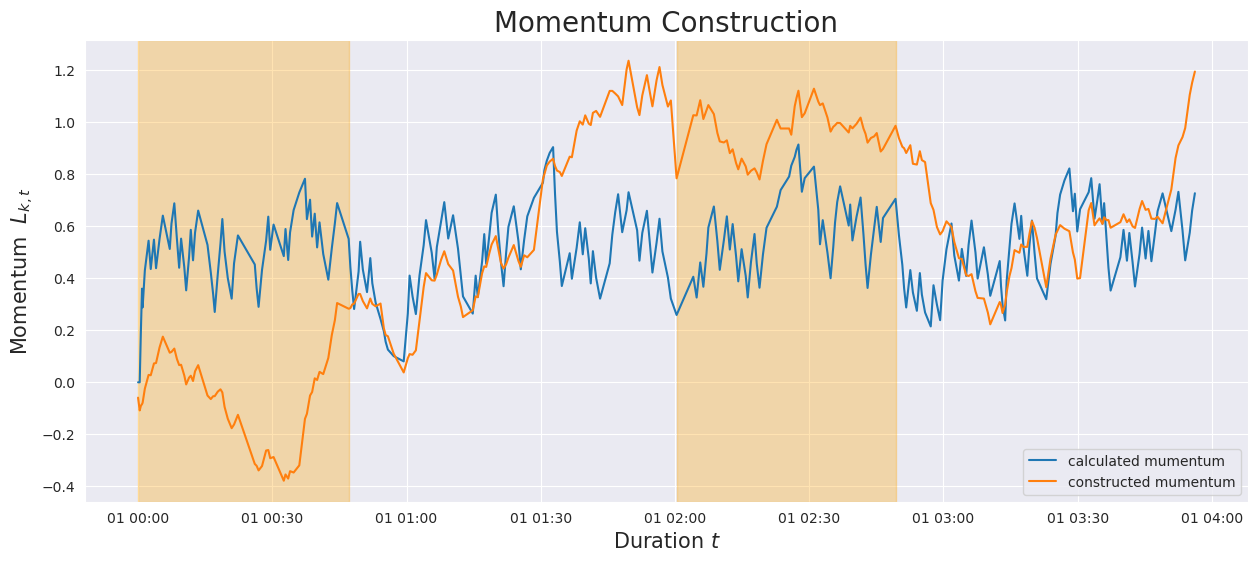

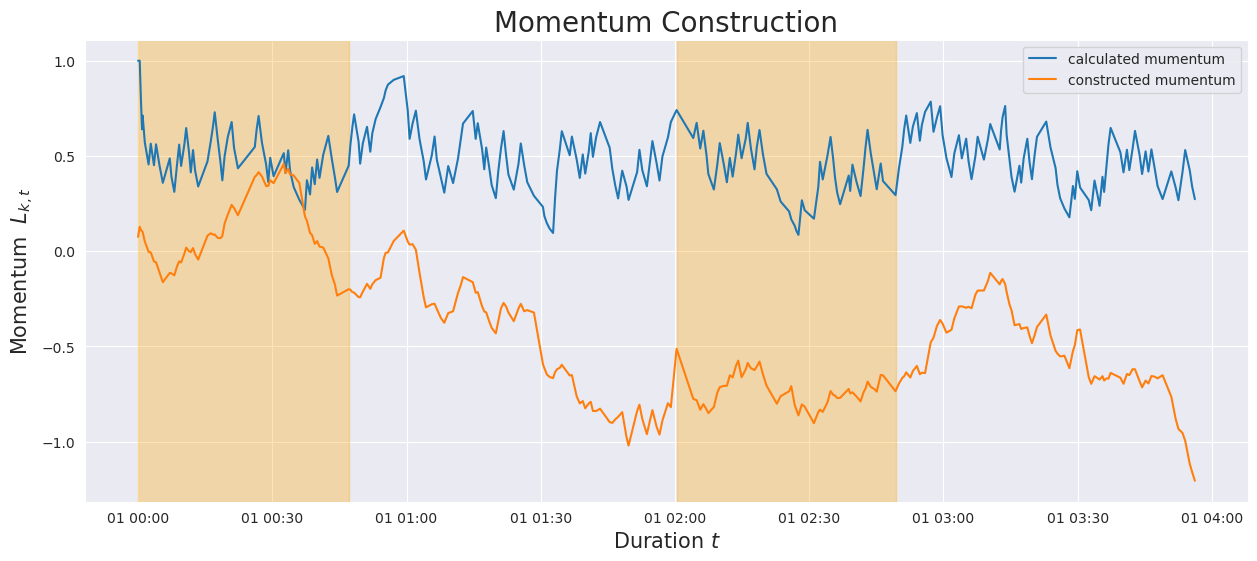

In [7]:
inputs = {
    'p1': ['p1_win', "p1_distance_run",  'p1_game_win','p2_game_win', 'p1_score_diff', 'p1_unf_err', 'p2_unf_err', "p1_ser_sp", 'p1_ser'],
    'p2': ['p2_win', "p2_distance_run",  'p1_game_win','p2_game_win', 'p1_score_diff', 'p1_unf_err', 'p2_unf_err', "p2_ser_sp", 'p2_ser'],
    'gen':[]
}

unit.train(inputs)
unit.construct_momentum()
unit.show_constructed(1)
unit.show_constructed(2)

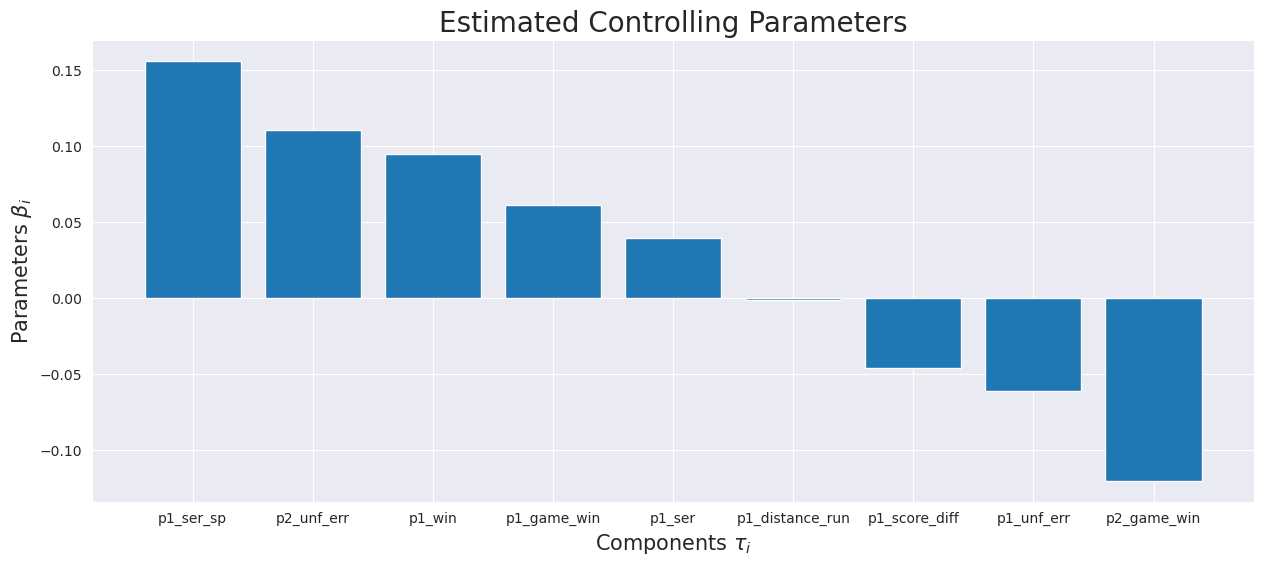

In [8]:
unit.show_params(True)

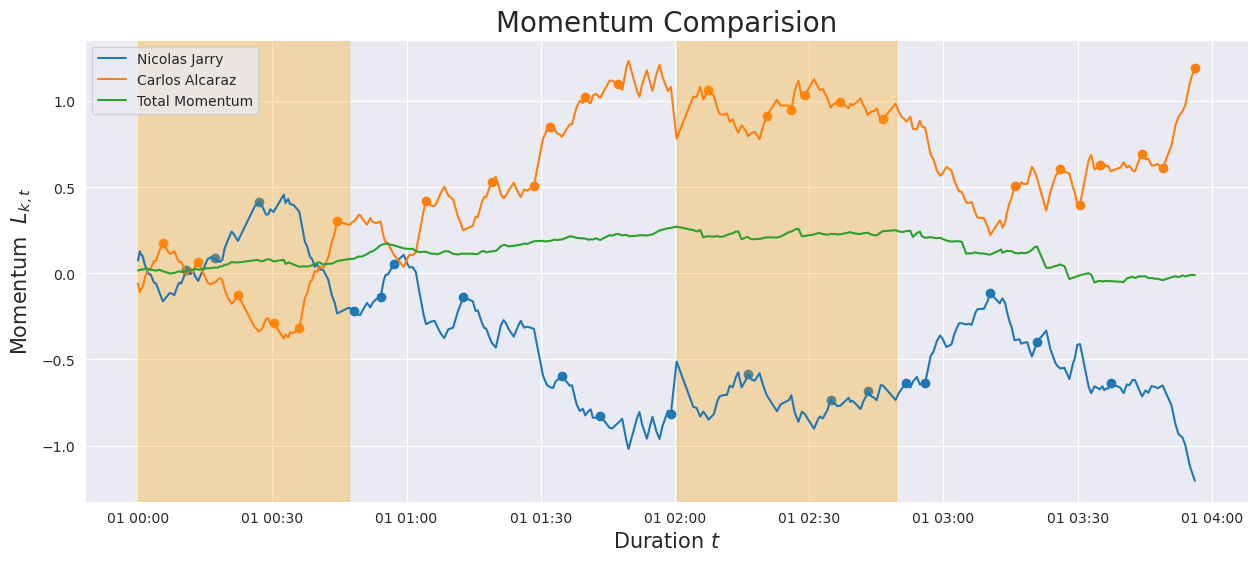

In [9]:
unit.compare_constructed()

/data1/yz812/mcm/utils/train.py:275: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr["winning rate 1"] = self.data[f"p1_win"].shift(1).fillna(0)
/home/yz812/anaconda3/lib/python3.11/site-packages/fontTools/misc/py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(


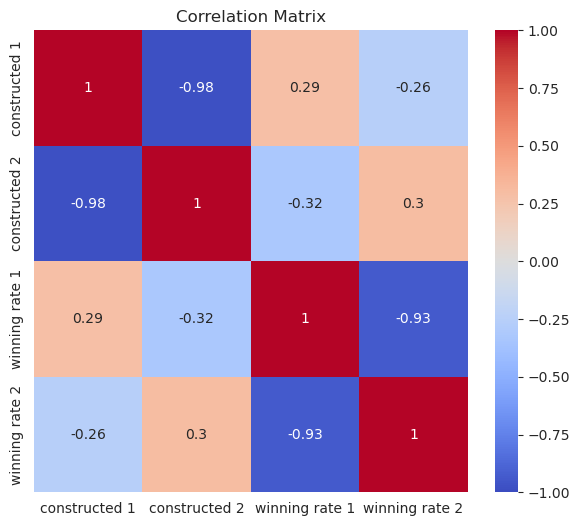

In [10]:
unit.corr()

from utils import visualize as vs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
vs.save("5-1-Corr")
plt.show()

In [11]:
unit.construct_energy()

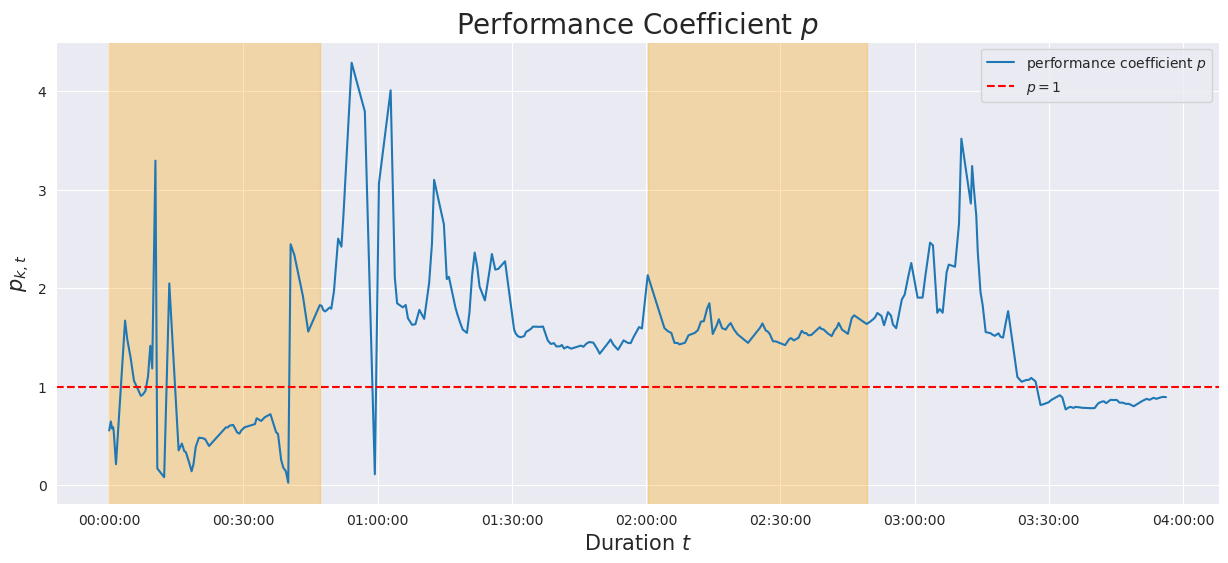

In [12]:
unit.compare_performance()

# Other Training Set

Carlos Alcaraz <-> Nicolas Jarry

Daniil Medvedev <-> Marton Fucsovics

Laslo Djere <-> Stefanos Tsitsipas

In [13]:
pairs_n = pairs[pairs["player1"].isin(["Carlos Alcaraz", "Daniil Medvedev", "Laslo Djere"]) & pairs["player2"].isin(["Nicolas Jarry", "Marton Fucsovics", "Stefanos Tsitsipas"])]
pairs_n

,Unnamed: 0,player1,player2
0,0,Carlos Alcaraz,Nicolas Jarry
4,4,Daniil Medvedev,Marton Fucsovics
7,7,Laslo Djere,Stefanos Tsitsipas


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/home/yz812/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


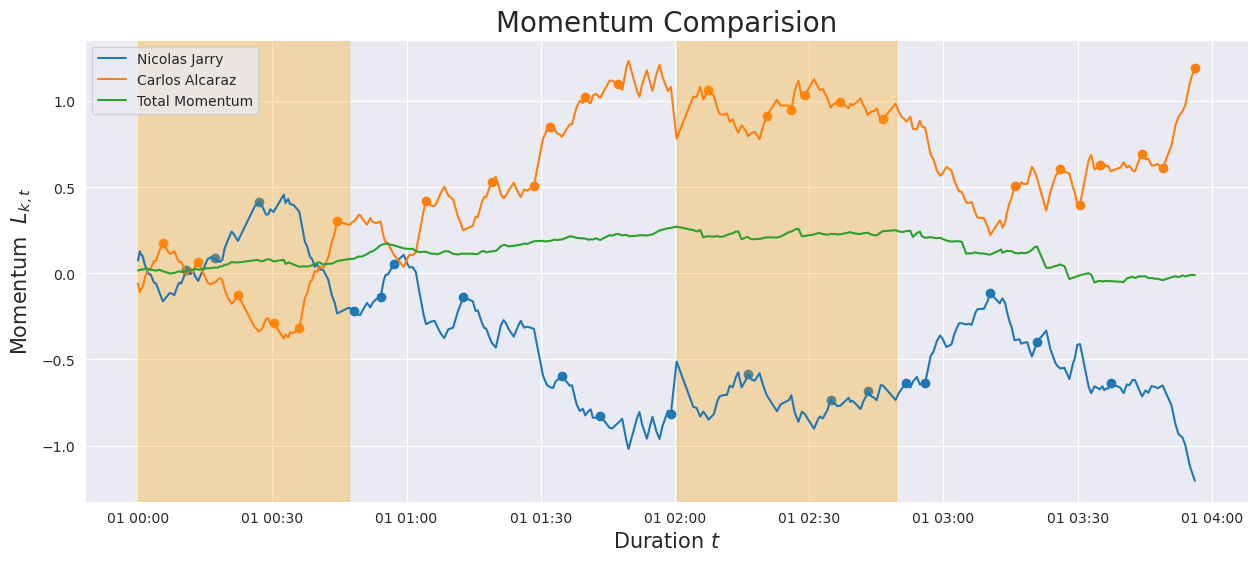

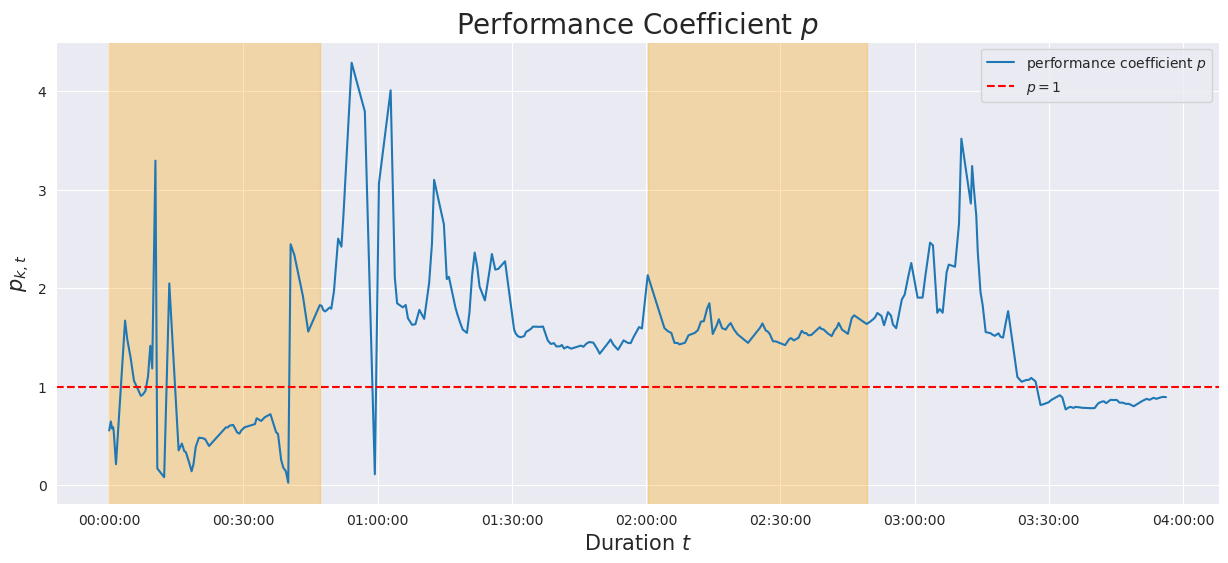

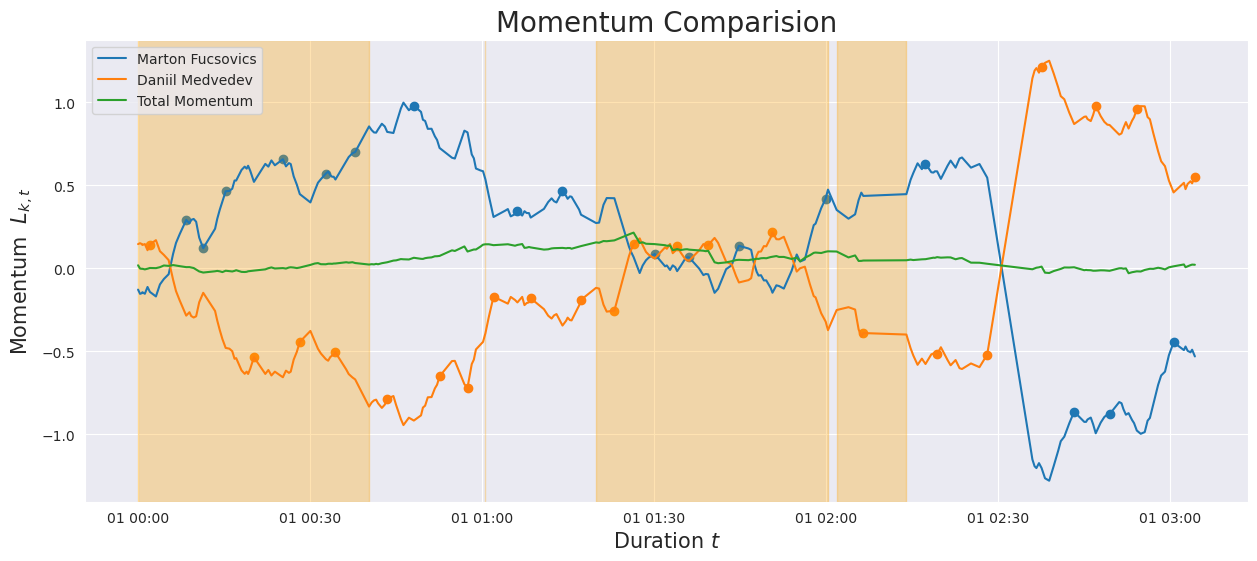

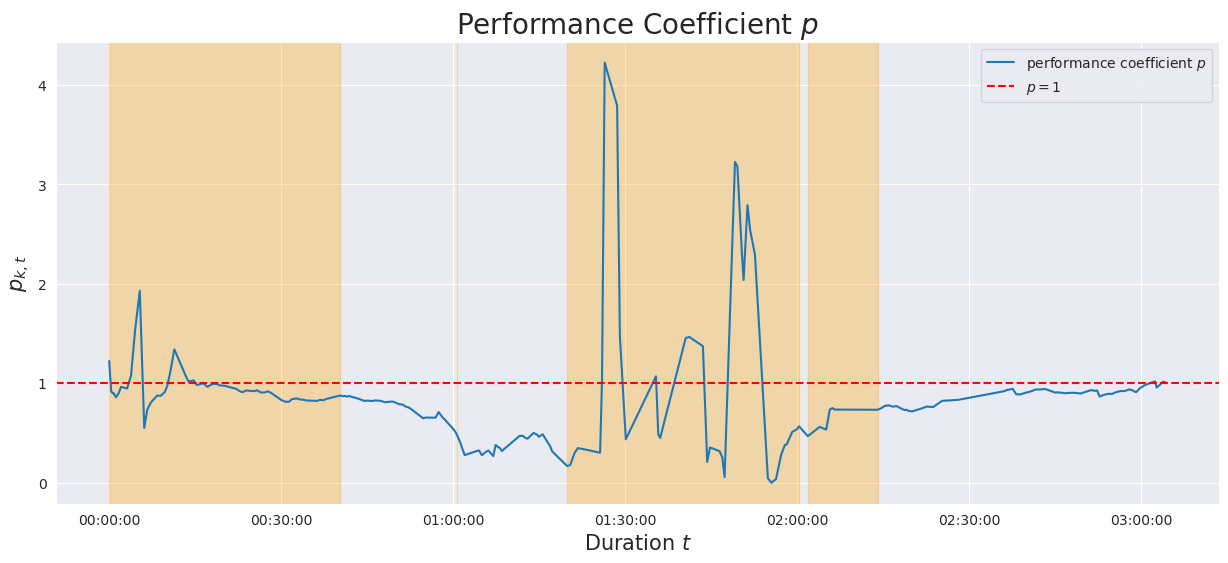

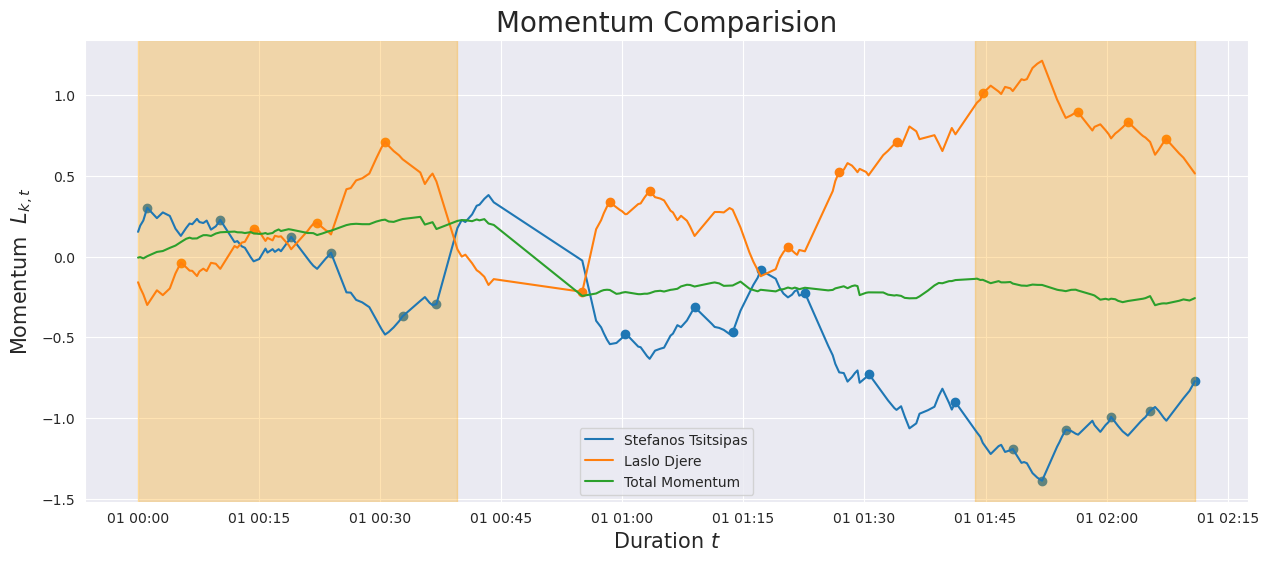

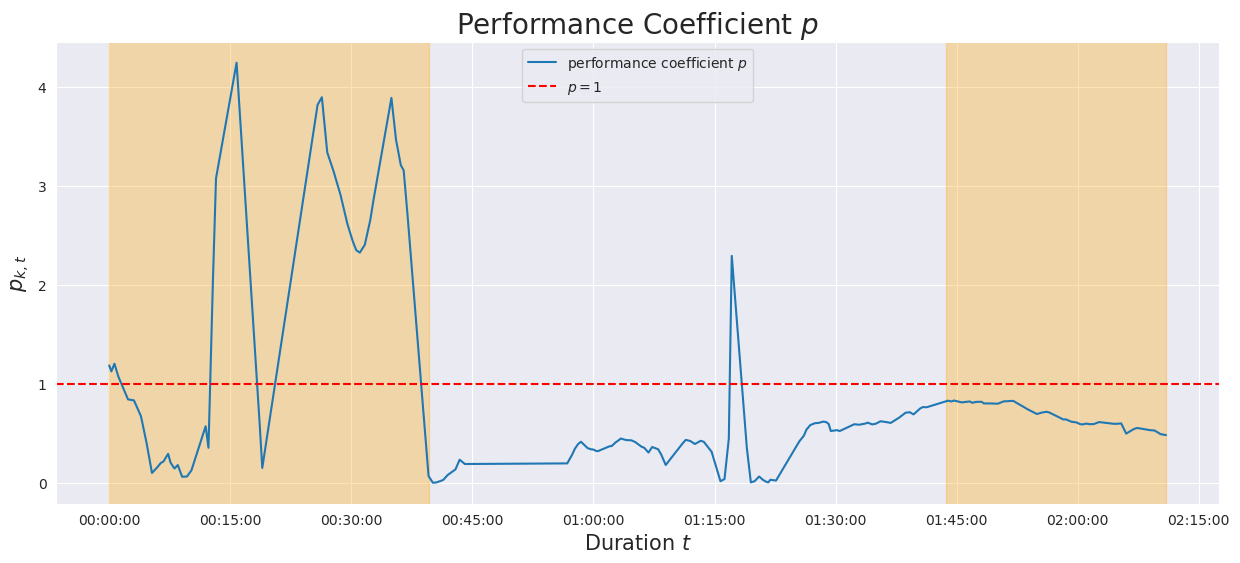

In [14]:
for index, row in pairs_n.iterrows():
    
    p1 = row["player1"]
    p2 = row["player2"]

    u = tr.ModelUnit(p1, p2, data)

    u.preprocess()
    u.prefilter()

    u.calc_torque(players["Inertia"])
    u.train(inputs)
    #u.show_params()
    u.construct_momentum()
    u.compare_constructed()
    vs.save(f"flow/4-2-Flow-{p1[0]}")
    u.construct_energy()
    u.compare_performance()
    vs.save(f"flow/4-2-Perform-{p1[0]}")

/data1/yz812/mcm/utils/train.py:286: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr["winning rate 1"] = self.data[f"p1_win"]
/data1/yz812/mcm/utils/train.py:287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr["winning rate 2"] = self.data[f"p2_win"]
/data1/yz812/mcm/utils/train.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

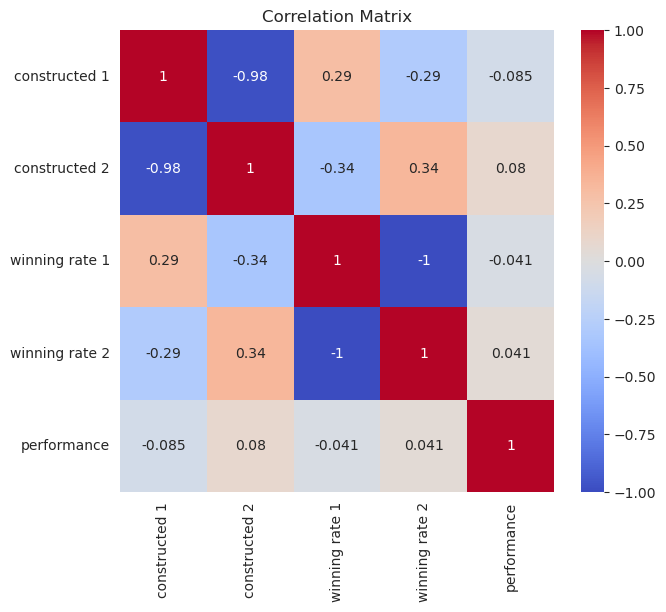

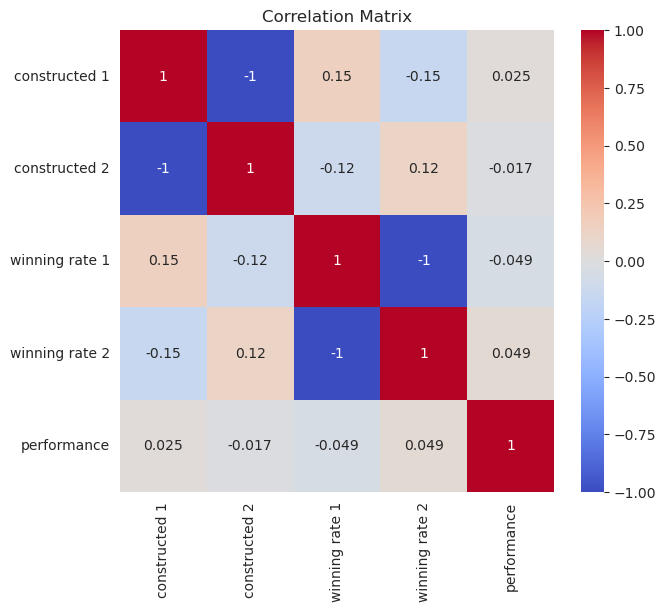

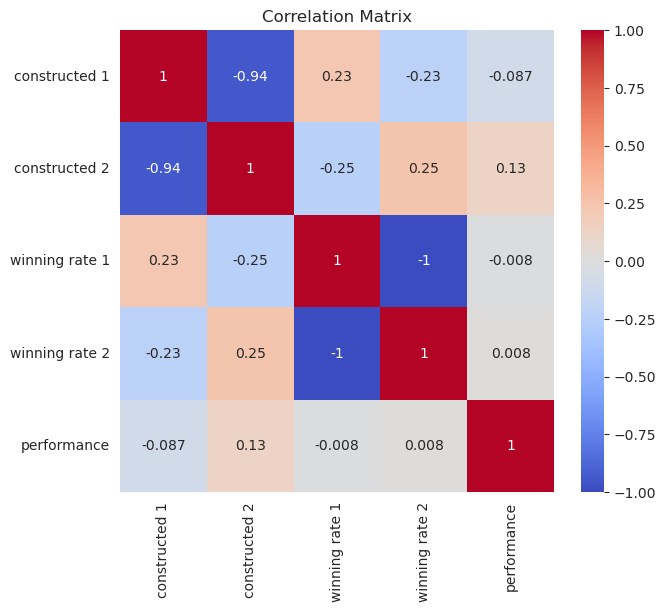

In [15]:
for index, row in pairs_n.iterrows():
    
    p1 = row["player1"]
    p2 = row["player2"]

    u = tr.ModelUnit(p1, p2, data)

    u.preprocess()
    u.prefilter()

    u.calc_torque(players["Inertia"])
    u.train(inputs)
    #u.show_params()
    u.construct_momentum()
    u.construct_energy()
    u.corr2()
    #vs.save(f"flow/4-2-Corr-{p1[0]}", None)
    plt.plot()